In [3]:
# importing libraries

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math

import warnings
warnings.filterwarnings("ignore")

In [7]:
# function which plots ibm stock prices: real and predicted both

def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("Stock price prediction")
    plt.xlabel("time")
    plt.ylabel("IBM stock price")
    plt.legend()
    plt.show()

In [8]:
# function which calculates root mean squared error

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import yfinance as yf

# For time stamps
from datetime import datetime

yf.pdr_override()

data = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [10]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500192,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567373,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706894,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839725,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400


In [11]:
train = data[:'2016'].iloc[:,1:2].values
test = data['2017':].iloc[:,1:2].values

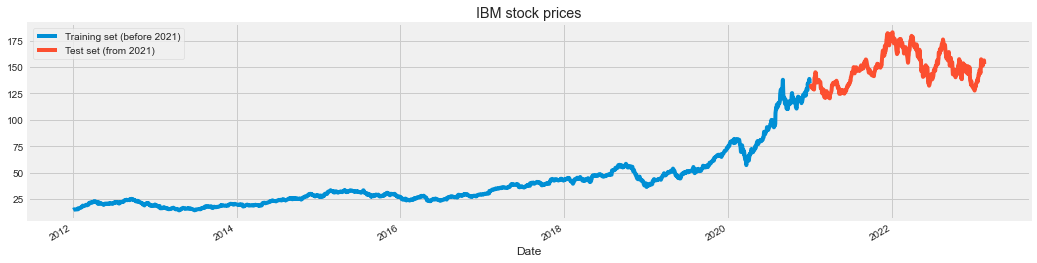

In [12]:
# visualization of "High" attribute of the dataset

data["High"][:'2020'].plot(figsize=(16,4), legend=True)
data["High"]["2021":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2021)", "Test set (from 2021)"])
plt.title("IBM stock prices")
plt.show()

In [13]:
# scaling the training set

sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(train)

train_data = scaled_data[0:int(training_data_len), :]

NameError: name 'training_data_len' is not defined

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements

x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train[0]

In [ ]:
y_train[0]

In [ ]:
len(x_train)

In [14]:
len(y_train)

2709

In [15]:
x_train.shape

(2709, 60)

In [16]:
y_train.shape

(2709,)

In [17]:
# reshaping x_train for efficient modelling

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [18]:
x_train.shape

(2709, 60, 1)

In [19]:
# LSTM architecture

regressor = Sequential()

# add first layer with dropout

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

# add second layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add third layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add fourth layer

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# the output layer

regressor.add(Dense(units=1))

In [20]:
# compiling the LSTM RNN network

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit to the training set

regressor.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
2709/2709 [==============================] - 35s 13ms/step - loss: 0.0235
Epoch 2/5
2709/2709 [==============================] - 29s 11ms/step - loss: 0.0098
Epoch 3/5
2709/2709 [==============================] - 29s 11ms/step - loss: 0.0086
Epoch 4/5
2709/2709 [==============================] - 29s 11ms/step - loss: 0.0072
Epoch 5/5
2709/2709 [==============================] - 29s 11ms/step - loss: 0.0062


In [21]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 'High' attribute data for processing

dataset_total = pd.concat((data['High'][:'2016'], data['High']['2017':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(3020,)
(311,)
(311, 1)
(311, 1)


In [22]:
# preparing x_test

x_test = []
for i in range(60,311):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
# predicting the stock prices for test set

predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)

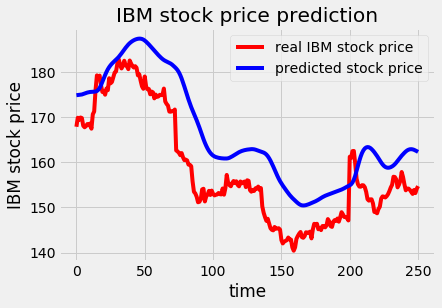

In [24]:
# visualizing the results: predicted vs test

plot_predictions(test, predicted)

In [25]:
# evaluating the model

return_rmse(test, predicted)

the root mean squared error is : 8.978465404852233.


Gated Recurrent Units

In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the output, .neither they have the output gate.

In [26]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [27]:
# compiling the model

regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train, y_train, epochs=5, batch_size=150)

Epoch 1/5
2709/2709 [==============================] - 7s 3ms/step - loss: 0.1215
Epoch 2/5
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0368
Epoch 3/5
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0088
Epoch 4/5
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0051
Epoch 5/5
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0041


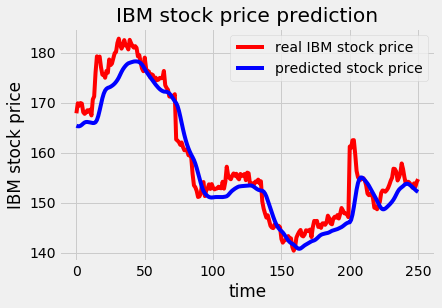

In [28]:
# predicting the stock prices for test set and visualization

predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = sc.inverse_transform(predicted_with_gru)

plot_predictions(test, predicted_with_gru)

In [29]:
# evaluating the model performance

return_rmse(test, predicted_with_gru)

the root mean squared error is : 3.7461857577368134.


Thanks if you find it useful! :)